[ 5.03741156e+02  3.16795468e-01  3.45980199e-01  2.88600469e-01
  1.27308153e-01 -6.37322590e-02 -8.08206350e-02  6.49363101e-02
 -1.95058603e-02  3.10135027e-03 -2.77843385e-04  1.32980058e-05
 -2.65302901e-07]


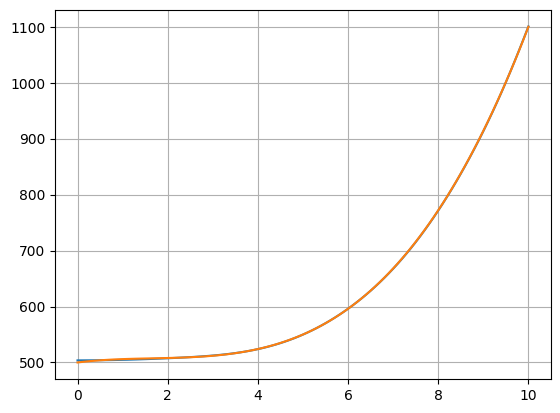

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10.1, 0.1)                                         # аргументы функции
y = np.array([i**3 - 5*i**2 + 10 * i + 500 for i in x])      # функция в виде полинома
x_train, y_train = x[::2], y[::2]                                   # обучающая выборка

#### ИЗМЕНЯТЬ L #####
N = 13      # размер признакового пространства (степень полинома N-1)
L = 20      # при увеличении N -> увеличение L(лямбда)(кратно): 12; 0.2    13; 20    15; 5000
# сначала проверим для L = 0 и затем увеличиваем

X = np.array([[a ** n for n in range(N)] for a in x])                       # матрица входных векторов
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])   # матрица lambda*I
IL[0][0] = 0        # omega0 не регуляризируем
X_train = X[::2]    # матрица обучающая выборка
Y = y_train   # обучающая выборка

# конечное вычисление коэффицентов по формуле ω = (XT*X + λ*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
w = Y @ X_train @ A
print(w)

# отображение исходного графика и прогноза
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)
plt.plot(x, y)
plt.grid(True)
plt.show()